In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [107]:
PATH = "./data"

df = pd.read_csv(PATH + "/e-com-data.csv")

In [108]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [109]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,36.139662
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,15.126994
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,40.005182
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,765.518462


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


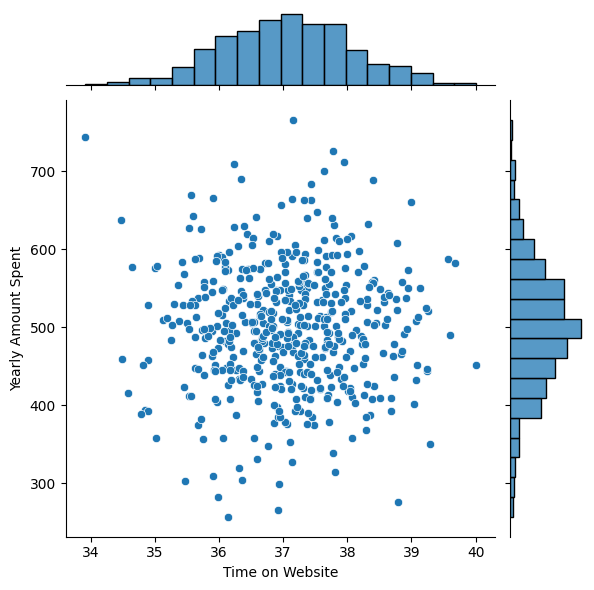

In [111]:
sns.jointplot(data=df, x="Time on Website", y="Yearly Amount Spent")

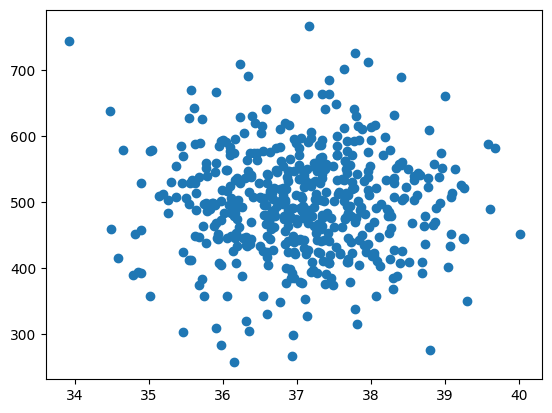

In [112]:
plt.scatter(x=df["Time on Website"], y=df["Yearly Amount Spent"])
plt.show()

In [113]:
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [116]:
print(X_train)

     Avg. Session Length  Time on App  Time on Website  Length of Membership
5              33.871038    12.026925        34.476878              5.493507
116            33.925795    12.011022        36.701052              2.753424
45             34.555768    12.170525        39.131097              3.663105
16             32.125387    11.733862        34.894093              3.136133
462            33.503810    11.233415        37.211153              2.320550
..                   ...          ...              ...                   ...
106            32.291756    12.190474        36.152462              3.781823
270            34.006489    12.956277        38.655095              3.275734
348            31.812483    10.886921        34.897828              3.128639
435            32.259973    14.132893        37.023479              3.762070
102            32.425697    11.448902        37.580190              2.586968

[350 rows x 4 columns]


In [117]:
from sklearn.linear_model import LinearRegression

In [118]:
lm = LinearRegression()

lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [133]:
lm.coef_ 

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [120]:
lm.score(X, y)

0.9842821675307221

In [123]:
df_new = df.iloc[:, 3:]
df_new.head()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


In [125]:
corr = df_new.corr()


<Axes: >

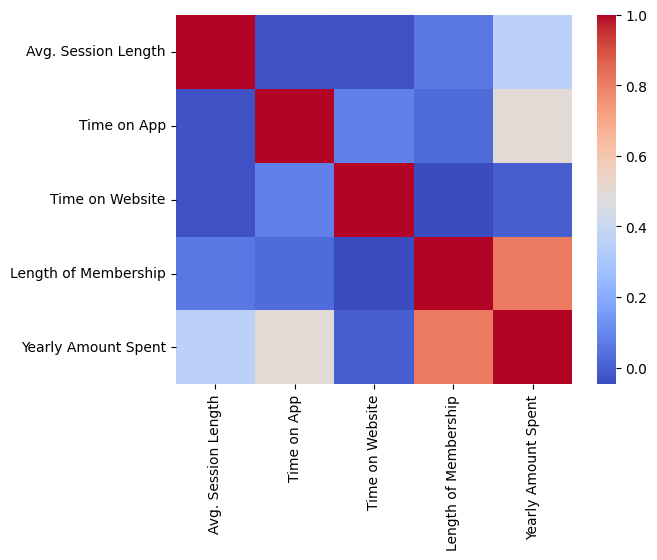

In [128]:
sns.heatmap(corr, cmap="coolwarm")

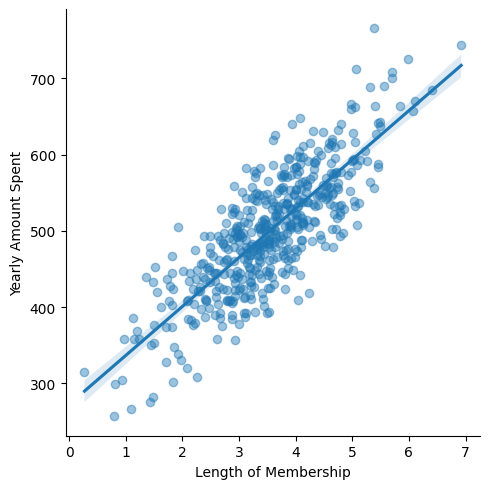

In [ ]:
sns.lmplot(data=df_new, x="Length of Membership", y="Yearly Amount Spent", scatter_kws={"alpha": 0.44}) 